In [16]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from pandas import concat
from sklearn import svm
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate

In [5]:
ge = pdr.get_data_yahoo('GE', datetime(2000, 1, 1), datetime(2018, 1, 1))
aapl = pdr.get_data_yahoo('AAPL', datetime(2000, 1, 1), datetime(2018, 1, 1))
fb = pdr.get_data_yahoo('FB', datetime(2012, 6, 6), datetime(2018, 1, 1))
gs = pdr.get_data_yahoo('GS', datetime(2000, 1, 1), datetime(2018, 1, 1))
btc = pdr.get_data_yahoo('BTC-USD', datetime(2011, 1, 1), datetime(2018, 1, 1))
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-06,26.070000,27.17,25.520000,26.809999,26.809999,61489200
2012-06-07,27.000000,27.35,26.150000,26.309999,26.309999,26159500
2012-06-08,26.549999,27.76,26.440001,27.100000,27.100000,38034000
2012-06-11,27.180000,28.07,26.840000,27.010000,27.010000,28219600
2012-06-12,27.480000,27.77,26.959999,27.400000,27.400000,15816800


In [6]:
#data preprocessing - dropping columns Close, Volume. Adj Close will be the Y variable
ge.drop(['Close','Volume'],axis =1, inplace = True)
aapl.drop(['Close','Volume'],axis =1, inplace = True)
fb.drop(['Close','Volume'],axis =1, inplace = True)
gs.drop(['Close','Volume'],axis =1, inplace = True)
btc.drop(['Close','Volume'],axis =1, inplace = True)
fb.head()

,Open,High,Low,Adj Close
Date,,,,
2012-06-06,26.070000,27.17,25.520000,26.809999
2012-06-07,27.000000,27.35,26.150000,26.309999
2012-06-08,26.549999,27.76,26.440001,27.100000
2012-06-11,27.180000,28.07,26.840000,27.010000
2012-06-12,27.480000,27.77,26.959999,27.400000


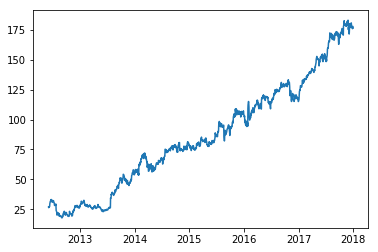

None

In [7]:
plt.plot(fb["Adj Close"])
display(plt.show())

In [45]:
#All the machine learning models works well with scaled down data points.Its a good practise to range the data between 0,1
#Not doing it now!!!

In [9]:
#####################################Training and Test data sets#############################################################
#We cannot use cross validation method here to validate our model because sequence is important in time series.##############
#Instead, we can split our past data into train data and test data.##########################################################

In [10]:
#Using 90% of the data for training and 10% for testing
fb_train_size = int(len(fb.values) * 0.9)
fb_test_size = len(fb.values) - fb_train_size
fb_train, fb_test = fb.values[0:fb_train_size,:], fb.values[fb_train_size:len(fb.values),:]

ge_train_size = int(len(ge.values) * 0.9)
ge_test_size = len(ge.values) - ge_train_size
ge_train, ge_test = ge.values[0:ge_train_size,:], ge.values[ge_train_size:len(ge.values),:]

aapl_train_size = int(len(aapl.values) * 0.9)
aapl_test_size = len(aapl.values) - aapl_train_size
aapl_train, aapl_test = aapl.values[0:aapl_train_size,:], aapl.values[aapl_train_size:len(aapl.values),:]

gs_train_size = int(len(gs.values) * 0.9)
gs_test_size = len(gs.values) - gs_train_size
gs_train, gs_test = gs.values[0:gs_train_size,:], gs.values[gs_train_size:len(gs.values),:]

btc_train_size = int(len(btc.values) * 0.9)
btc_test_size = len(btc.values) - btc_train_size
btc_train, btc_test = btc.values[0:btc_train_size,:], btc.values[btc_train_size:len(btc.values),:]

print(len(fb_train), len(fb_test))

1261 141


In [96]:
Xnum = fb.shape[1]-1
Xnum

(256, 453)

In [13]:
fb_trainX = fb_train[:, :Xnum] 
fb_trainY = fb_train[:,-1]
ge_trainX = ge_train[:, :Xnum] 
ge_trainY = ge_train[:,-1]
aapl_trainX = aapl_train[:, :Xnum] 
aapl_trainY = aapl_train[:,-1]
gs_trainX = gs_train[:, :Xnum] 
gs_trainY = gs_train[:,-1]
btc_trainX = btc_train[:, :Xnum] 
btc_trainY = btc_train[:,-1]
    
fb_testX = fb_test[:, :Xnum] 
fb_testY = fb_test[:,-1]
ge_testX = ge_test[:, :Xnum] 
ge_testY = ge_test[:,-1]
aapl_testX = aapl_test[:, :Xnum] 
aapl_testY = aapl_test[:,-1]
gs_testX = gs_test[:, :Xnum] 
gs_testY = gs_test[:,-1]
btc_testX = btc_test[:, :Xnum] 
btc_testY = btc_test[:,-1]

In [14]:
#Input is reshaped to 3D    
fb_trainX = np.reshape(fb_trainX,(fb_trainX.shape[0], Xnum))
ge_trainX = np.reshape(ge_trainX,(ge_trainX.shape[0], Xnum))
aapl_trainX = np.reshape(aapl_trainX,(aapl_trainX.shape[0], Xnum))
gs_trainX = np.reshape(gs_trainX,(gs_trainX.shape[0], Xnum))
btc_trainX = np.reshape(btc_trainX,(btc_trainX.shape[0], Xnum))

fb_testX = np.reshape(fb_testX,(fb_testX.shape[0], Xnum))
ge_testX = np.reshape(ge_testX,(ge_testX.shape[0], Xnum))
aapl_testX = np.reshape(aapl_testX,(aapl_testX.shape[0], Xnum))
gs_testX = np.reshape(gs_testX,(gs_testX.shape[0], Xnum))
btc_testX = np.reshape(btc_testX,(btc_testX.shape[0], Xnum))

In [85]:
############################################# Build and fit LSTM Model #############################################

In [86]:
fb_svr = svm.SVR(kernel='rbf',C=100,gamma=.0000001).fit(fb_trainX,fb_trainY)
fb_predictions = fb_svr.predict(fb_testX)

In [87]:
aapl_svr = svm.SVR(kernel='rbf',C=10,gamma=.000005).fit(aapl_trainX,aapl_trainY)
aapl_predictions = aapl_svr.predict(aapl_testX)

In [109]:
ge_svr = svm.SVR(kernel='rbf',C=100,gamma=.000005).fit(ge_trainX,ge_trainY)
ge_predictions = ge_svr.predict(ge_testX)

In [110]:
gs_svr = svm.SVR(kernel='rbf',C=100,gamma=.000005).fit(gs_trainX,gs_trainY)
gs_predictions = aapl_svr.predict(gs_testX)

In [ ]:
btc_svr = svm.SVR(kernel='rbf',C=100,gamma=.00000001).fit(btc_trainX,btc_trainY)
btc_predictions = btc_svr.predict(btc_testX)

In [98]:
fb_original = fb_testY
aapl_original = aapl_testY
ge_original = ge_testY
gs_original = gs_testY
btc_original = btc_testY

In [108]:
#Calculate RMSE
fb_rmse = sqrt(mean_squared_error(fb_original, fb_predictions))
print('FB - Test RMSE: %.3f' % fb_rmse)
aapl_rmse = sqrt(mean_squared_error(aapl_original, aapl_predictions))
print('AAPL - Test RMSE: %.3f' % aapl_rmse)
ge_rmse = sqrt(mean_squared_error(ge_original, ge_predictions))
print('GE - Test RMSE: %.3f' % ge_rmse)
gs_rmse = sqrt(mean_squared_error(gs_original, gs_predictions))
print('GS - Test RMSE: %.3f' % gs_rmse)
btc_rmse = sqrt(mean_squared_error(btc_original, btc_predictions))
print('BTC - Test RMSE: %.3f' % btc_rmse)

FB - Test RMSE: 1.402
AAPL - Test RMSE: 4.704
GE - Test RMSE: 7.852
GS - Test RMSE: 12.142
BTC - Test RMSE: 5783.372


In [ ]:
#FB
fig = plt.figure()
plt.plot(fb_predictions, color='red', label='Prediction')
plt.plot(fb_original, color='blue', label='Original')
plt.legend(loc='best')
plt.title("FB SVR- Predictions Vs Original")
display(plt.show())
plt.close(fig)

In [ ]:
#AAPL
fig = plt.figure()
plt.plot(aapl_predictions, color='red', label='Prediction')
plt.plot(aapl_original, color='blue', label='Original')
plt.legend(loc='best')
plt.title("AAPL SVR- Predictions Vs Original")
display(plt.show())
plt.close(fig)

In [ ]:
#GE
fig = plt.figure()
plt.plot(ge_predictions, color='red', label='Prediction')
plt.plot(ge_original, color='blue', label='Original')
plt.legend(loc='best')
plt.title("GE SVR- Predictions Vs Original")
display(plt.show())
plt.close(fig)

In [ ]:
#GS
fig = plt.figure()
plt.plot(gs_predictions, color='red', label='Prediction')
plt.plot(gs_original, color='blue', label='Original')
plt.legend(loc='best')
plt.title("GS SVR- Predictions Vs Original")
display(plt.show())
plt.close(fig)

In [ ]:
#BTC
fig = plt.figure()
plt.plot(btc_predictions, color='red', label='Prediction')
plt.plot(btc_original, color='blue', label='Original')
plt.legend(loc='best')
plt.title("BTC SVR- Predictions Vs Original")
display(plt.show())
plt.close(fig)